In [61]:
%pip install matplotlib
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math


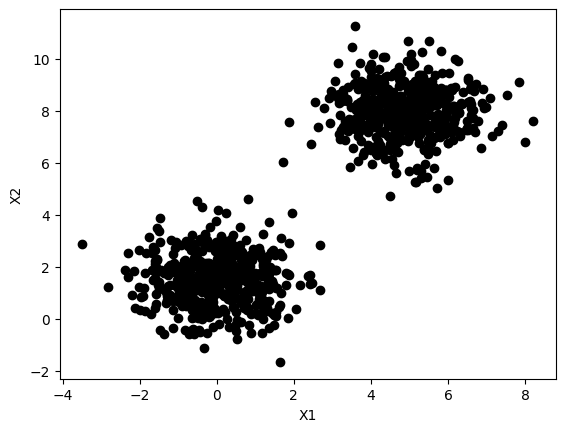

In [181]:
data, lx = make_blobs(n_samples=1000, n_features=2, centers=2)
plt.scatter(data[:,0],data[:,1], marker='o', color="black")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [64]:
def dist(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [196]:
def kmeans(data, n_clusters=2, max_error_rep=5):
    
    x = np.random.choice(range(int(data[:, 0].min()), int(data[:, 0].max())), size=(n_clusters), replace=False).astype(float)
    y = np.random.choice(range(int(data[:, 1].min()), int(data[:, 1].max())), size=(n_clusters), replace=False).astype(float)

    cluster = list(np.zeros(len(data)).astype(int))
    
    error_rep_count = 0
    last_error=0

    while error_rep_count<max_error_rep:
        error = 0 
        
        for i in range(len(data)):
            nearest = -1
            min_dist = float('inf')
            curr_pnt = [data[i, 0], data[i, 1]]

            for j in range(len(x)):
                curr_cnt = [x[j], y[j]]
                curr_dist = dist(curr_cnt, curr_pnt)
                if min_dist > curr_dist:
                    min_dist = curr_dist
                    nearest = j
            
            cluster[i] = nearest 
            error += min_dist**2
        
        sums_x=list(np.zeros(n_clusters))
        sums_y=list(np.zeros(n_clusters))
        totals=list(np.zeros(n_clusters))

        for i in range(len(cluster)):
            sums_x[cluster[i]]+=data[i,0]
            sums_y[cluster[i]]+=data[i,1]
            totals[cluster[i]]+=1

        for i in range(len(totals)):
            dx=0
            dy=0
            if totals[i]==0:
                dx,dy = np.random.randint(int(data[:, 1].min()), int(data[:, 1].max()), size=2)
            else:
                dx=float(sums_x[i])/totals[i]
                dy=float(sums_y[i])/totals[i]

            x[i]=dx
            y[i]=dy
        if(last_error == error): error_rep_count+=1
        else: last_error=error

    print(f'erro: {error}')
    return cluster, list(x), list(y)


erro: 1113.5399818773865


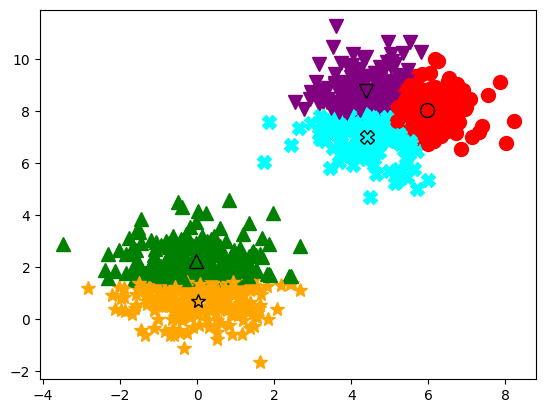

erro: 1096.7245588819872


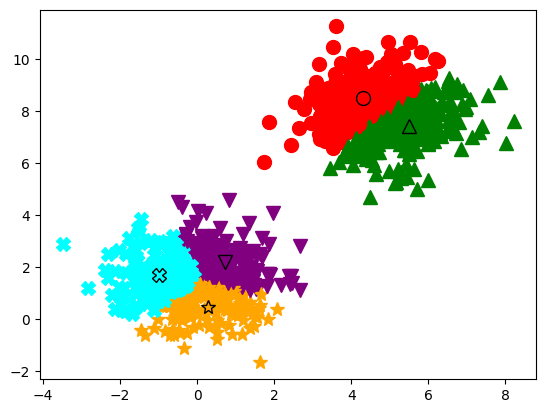

erro: 1108.3893090717534


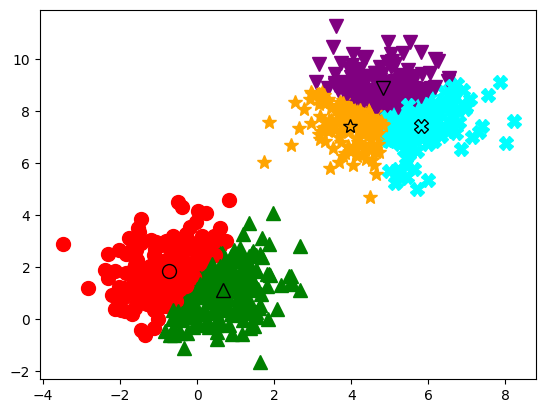

erro: 1312.8316946351915


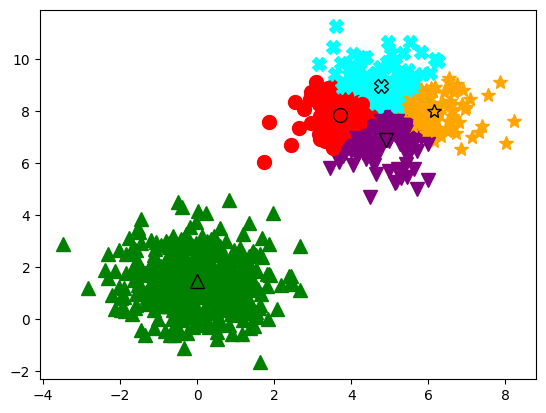

erro: 1100.7596081002873


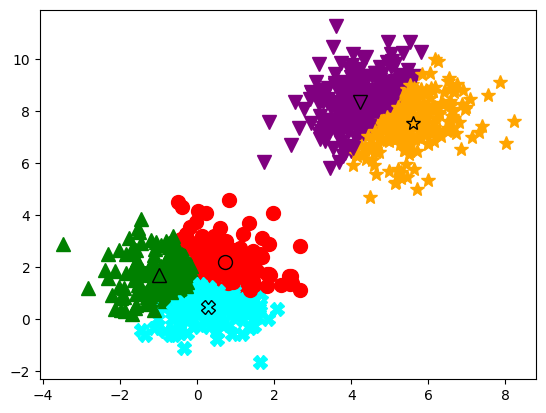

erro: 1112.9873385051162


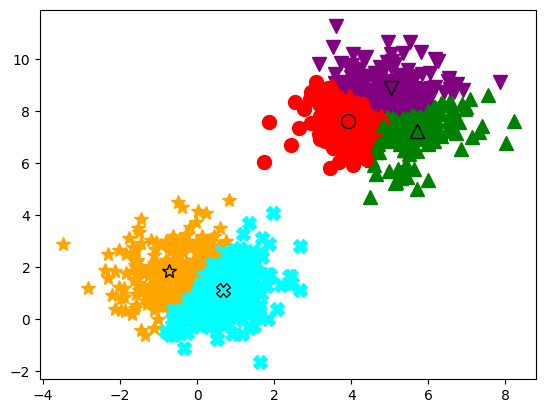

erro: 1108.6717111848134


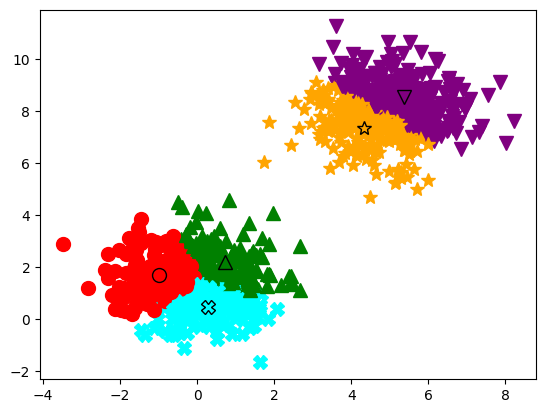

erro: 1108.3893090717534


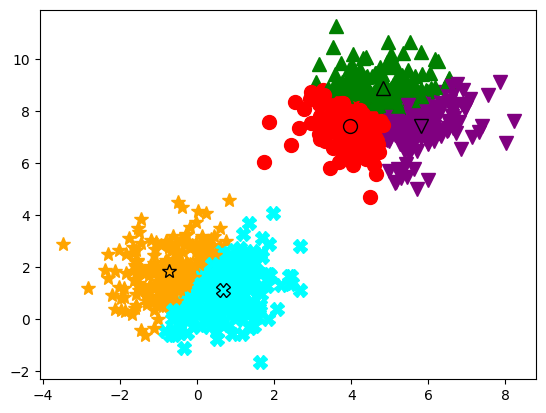

erro: 1108.3893090717534


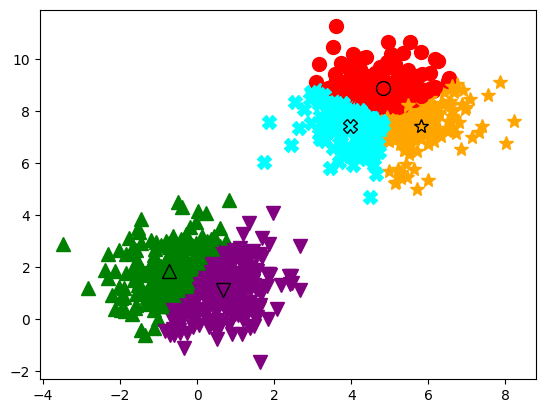

erro: 1119.6393614911358


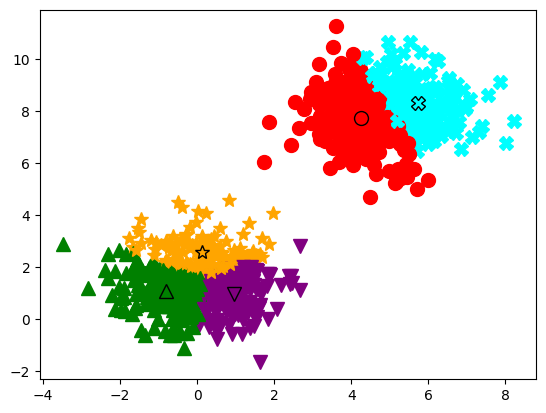

In [197]:
markers = ['o', 'v', '^', '*', 'X']
colors = ['red', 'purple', 'green', 'orange','cyan']

for i in range(10):
    cluster,x,y=kmeans(data=data, n_clusters=5)
    for i in range(len(data)):
        plt.plot(data[i, 0], data[i, 1], marker=markers[cluster[i]], color=colors[cluster[i]], markersize=10)

    for i in range(len(x)):
        plt.plot(x[i], y[i], marker=markers[i], color=colors[i], markersize=10, markeredgewidth=1, markeredgecolor='black')

    plt.show()